In [1]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
%matplotlib inline

In [3]:
#importação da base de dados , estavamos tendo problema com o algoritmo devido a quantidade de registros
#Com metade tambem , então estamos realizando o teste com apenas 31154 registros , onde foram escolhidos registros aleatorios

dados = pd.read_csv('alvara_dbscan.csv',sep=',')

In [4]:
dados.shape

(10000, 5)

In [5]:
#visualização dos dados
dados.iloc[0:5]

,ano,mes,categ_alvara,status_binario,categ_emp
0,2017,8,1,1,5
1,2017,8,1,1,5
2,2017,8,1,1,5
3,2017,8,1,1,3
4,2017,8,1,2,5


In [4]:
#rodando o DBSCAN

dbscan = DBSCAN(eps=0.10,min_samples=30)

In [5]:
#treinando o algoritmo
dbscan.fit(dados)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=30, n_jobs=1, p=None)

In [6]:
#visualização das Labels criadas
dbscan.labels_

array([ 0,  0,  0, ..., 15, 15, 15], dtype=int64)

In [8]:
#Treinando o DBscan

dados['labels'] = dbscan.labels_

In [9]:
dados.iloc[0:4]

,ano,mes,categ_alvara,status_binario,categ_emp,labels
0,2017,8,1,1,5,0
1,2017,8,1,1,5,0
2,2017,8,1,1,5,0
3,2017,8,1,1,3,1


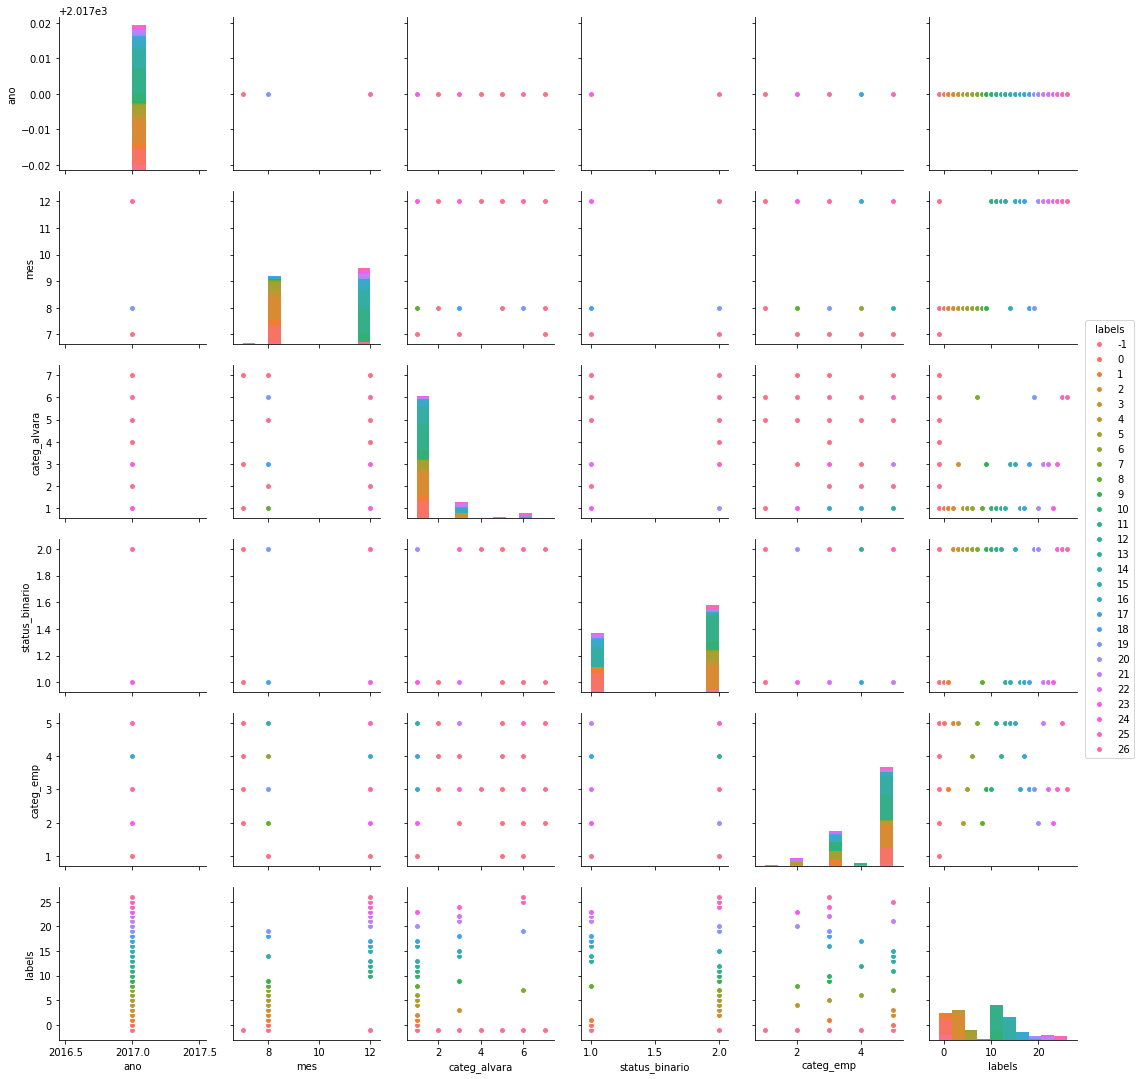

In [28]:
sb.pairplot(dados,'labels')

# para rodar o o DBSCAN utlizamos a mesma base utilizada no kmeans , O DBSCAN se mostrou um algoritmo pesado para o processamento
# de grandes quantidade de dados.O tempo de resposta do kmeans e bem menor.

# O DBSCAN e um algoritmo de desnsidade , seu funcionamente e diferente do kmeans  
# PLOT dos dados para analise

In [7]:
# 28 labels foram criadas , numero muito elevado levando em consideração o kmeans em que 5 foi uma boa quantida de grupos

# vamos retirar a variavel mes que não tem uma importancia muito grande em nosso DataSet e executar o algoritimo novamente


dataset = dados[['ano','categ_alvara','status_binario','categ_emp']]

In [12]:
dataset.iloc[0:3]

,ano,categ_alvara,status_binario,categ_emp
0,2017,1,1,5
1,2017,1,1,5
2,2017,1,1,5


In [8]:
#vamos mudar tambem a quantidade de eps para 30 e min_samples para 60

dbscan = DBSCAN(eps=0.10,min_samples=30)

In [9]:
dbscan.fit(dataset)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=30, n_jobs=1, p=None)

In [10]:
dataset ['labels'] = dbscan.labels_

Text(0.5,1,'Grafico de Dispersão')

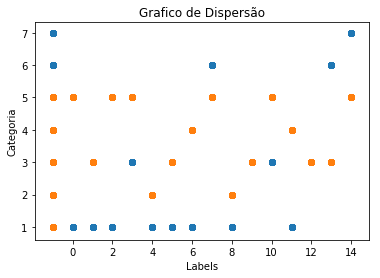

In [34]:
x = dataset['labels']
y = dataset['categ_alvara']
plt.scatter(x,y)
plt.xlabel('Labels')
plt.ylabel('Categoria')
plt.title('Grafico de Dispersão')
x = dataset['labels']
y = dataset['categ_emp']
plt.scatter(x,y)
plt.xlabel('Labels')
plt.ylabel('Categoria')
plt.title('Grafico de Dispersão')

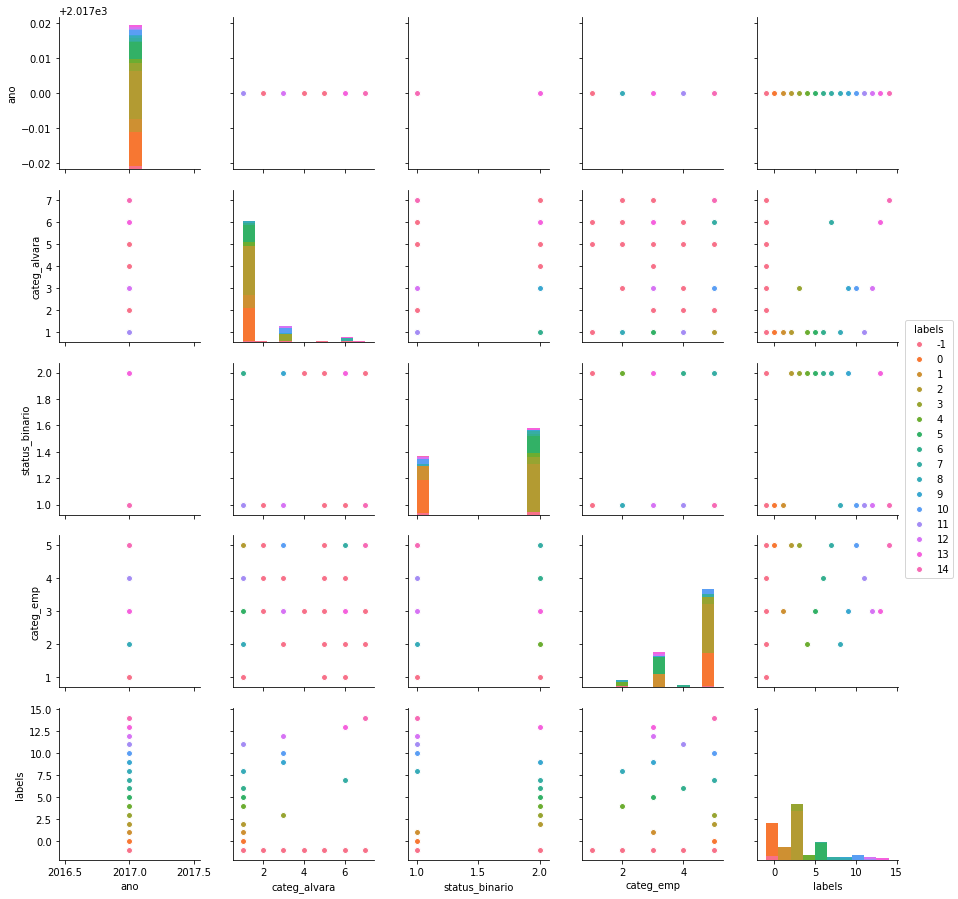

In [12]:
# com a base atualizada sem a variavel mes , vamos ver como fica a plotagem do grafico
sb.pairplot(dataset,'labels')

In [21]:
# podemos ver que sem a variavel mes , o numero de clusters de 47 foi para 27 , 20 grupos a menos , mesmo assim o numero de 
# agrupamentos foi alto , temos apenas 5 grupos de empresas e 7 tipos de alvaras , onde cada um pode esta defeiro ou não
#

In [13]:
X = dataset

In [15]:
for n_cluster in range(2, 15):
    dbscan = DBSCAN(eps=0.30,min_samples=30).fit(X)
    label = dbscan.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.978283452985423
For n_clusters=3, The Silhouette Coefficient is 0.978283452985423
For n_clusters=4, The Silhouette Coefficient is 0.978283452985423
For n_clusters=5, The Silhouette Coefficient is 0.978283452985423
For n_clusters=6, The Silhouette Coefficient is 0.978283452985423
For n_clusters=7, The Silhouette Coefficient is 0.978283452985423
For n_clusters=8, The Silhouette Coefficient is 0.978283452985423
For n_clusters=9, The Silhouette Coefficient is 0.978283452985423
For n_clusters=10, The Silhouette Coefficient is 0.978283452985423
For n_clusters=11, The Silhouette Coefficient is 0.978283452985423
For n_clusters=12, The Silhouette Coefficient is 0.978283452985423
For n_clusters=13, The Silhouette Coefficient is 0.978283452985423
For n_clusters=14, The Silhouette Coefficient is 0.978283452985423
